# Pipeline Automation and Model Monitoring

**Introduction to MLRun - a**

????

Tutorial steps:
- [**Run full workflow with train, optimze & deploy**](#full-workflow)

In [1]:
import mlrun
# get/create a project and register the data prep and trainer function in it
project = mlrun.get_or_create_project(
    name="huggingface-demo", context="./"
)

> 2023-02-08 13:29:38,111 [warning] Server or client version is unstable. Assuming compatible: {'server_version': '0.0.0+unstable', 'client_version': '1.3.0-rc20'}
> 2023-02-08 13:29:38,153 [info] loaded project huggingface-demo from MLRun DB


In [2]:
project.set_function(name='server_tester', image='davesh0812/mlrun:mlrun-huggingface-demo-1',
                     handler='src.serving_test.model_server_tester', kind="job", with_repo=True)

<a id="full-workflow"></a>
## Run full workflow with train, optimze & deploy

You should use `project.set_workflow()` for load your workflow into the project, and when you can run it by using `project.run()` while the param name is key.


In [3]:
# Register the workflow file:
workflow_name = "training_workflow"
project.set_workflow(workflow_name, "src/training_workflow.py")

# Save the project:
project.save()

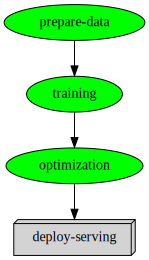

In [ ]:
workflow_run = project.run(
    name=workflow_name,
    arguments={
        "dataset_name": "Shayanvsf/US_Airline_Sentiment",
        "pretrained_tokenizer": "distilbert-base-uncased",
        "pretrained_model": "distilbert-base-uncased",
    },
    watch=True,
    dirty=True
)

Here we can see how the workflow looks on our UI & Also the result of the trainer and the server_tester

<img src="./images/workflow.png" alt="workflow" width="1200"/>

<img src="./images/latancy.png" alt="latancy" width="1200"/>

In [ ]:
serving_function = project.get_function("serving")

In [ ]:
body = "i love flying"
response = serving_function.invoke(path='/predict', body=body)
print(response)